Fonte dos dados: http://fossilworks.org/


Para que façamos uma boa análise de dados, precisamos formular boas perguntas. Aqui estão algumas perguntas que pretendo responder com esse conjunto de dados: 

 

*   Periodos geológicos da amostra;
*   Espécies mais abundantes;
*   Generos mais abundantes;
*   Laboratórios com mais fósseis registrados;
*   



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
dados = pd.read_csv("/content/drive/My Drive/DataScience/Paleo/Dados_20_10/ChristianFreitas-occs.csv", sep = ",")

In [5]:
#Visualizando a quantidade de linhas e colunas
dados.shape

(5071, 13)

In [6]:
#Visualizando as 5 primeiras linhas
dados.head()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
0,12855,PaleoDB,E. Fara,n. gen.,Noterpeton,n. sp.,bolivianum,NaN,NaN,NaN,NaN,39674,Cretaceous 8
1,12855,PaleoDB,E. Fara,NaN,Pucabatis,NaN,hoffstetteri,NaN,NaN,NaN,NaN,39674,Cretaceous 8
2,12855,PaleoDB,E. Fara,NaN,Pucapristis,NaN,branisi,NaN,NaN,NaN,NaN,39674,Cretaceous 8
3,12855,PaleoDB,E. Fara,NaN,Coelodus,NaN,toncoensis,NaN,NaN,NaN,NaN,39674,Cretaceous 8
4,12855,PaleoDB,E. Fara,NaN,Lepisosteus,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8


In [7]:
#Visualizando as 5 últimas linhas
dados.tail()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
5066,210982,NaN,P. Wagner,NaN,Sacabambaspis,NaN,janvieri,NaN,NaN,NaN,NaN,72844,Ordovician 4
5067,210982,NaN,P. Wagner,NaN,Dignomia,NaN,munsterii,NaN,Dignomia,NaN,boliviana,72844,Ordovician 4
5068,210982,NaN,P. Wagner,NaN,Bistramia,NaN,elegans,NaN,NaN,NaN,NaN,72844,Ordovician 4
5069,210982,NaN,P. Wagner,NaN,Homalonotus,NaN,bistrami,NaN,NaN,NaN,NaN,72844,Ordovician 4
5070,211282,NaN,P. Mannion,NaN,Psilopterus,NaN,sp.,NaN,NaN,NaN,NaN,72952,Cenozoic 6


In [8]:
#Verificando o nome das colunas
dados.columns

Index(['collection_no', 'source_database', 'collection.authorizer',
       'occurrence.genus_reso', 'occurrence.genus_name',
       'occurrence.species_reso', 'occurrence.species_name',
       'original.genus_reso', 'original.genus_name', 'original.species_reso',
       'original.species_name', 'collection.reference_no', '10_my_bin'],
      dtype='object')

In [9]:
#Verificando a quantidade de valores que inexistentes
dados.isnull().sum()

collection_no                 0
source_database            1157
collection.authorizer         0
occurrence.genus_reso      4285
occurrence.genus_name         0
occurrence.species_reso    3941
occurrence.species_name       0
original.genus_reso        5014
original.genus_name        4296
original.species_reso      4937
original.species_name      4296
collection.reference_no       0
10_my_bin                  1030
dtype: int64

Podemos ver, as espécies de muitos fósseis presentes neste conjunto de dados, ainda não foram identificadas. Sabemos disso porque é utilizado a abreviação "sp", para esses casos.

Fonte: [Embrapa](https://www.embrapa.br/manual-de-editoracao/nomenclatura-cientifica/nomes-cientficos/-/journal_content/56_INSTANCE_HscRfKvOm1wj/1355746/28877098?p_p_state=pop_up&_56_INSTANCE_HscRfKvOm1wj_page=1&_56_INSTANCE_HscRfKvOm1wj_viewMode=print#:~:text=Quando%20a%20esp%C3%A9cie%20ainda%20n%C3%A3o,it%C3%A1lico%2C%20e%20as%20abreviaturas%20sp.)

In [10]:
dados['occurrence.species_name'].value_counts()

sp.             1256
paraensis         34
brasiliensis      28
colombianus       26
pirabensis        23
                ... 
selenensis         1
mariosuarezi       1
jungi              1
gezi               1
hunteri            1
Name: occurrence.species_name, Length: 1720, dtype: int64

In [11]:
dados[dados['occurrence.species_name'] == "sp."].head()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
4,12855,PaleoDB,E. Fara,NaN,Lepisosteus,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
6,12855,PaleoDB,E. Fara,NaN,Rhineastes,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
16,12855,PaleoDB,E. Fara,NaN,Andinichthys,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
18,12855,PaleoDB,E. Fara,NaN,Enchodus,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
19,12855,PaleoDB,E. Fara,NaN,Santosius,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8


In [12]:
dados[dados['occurrence.species_name'] == "brasiliensis"].head()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
88,13220,Fossilworks,J. Alroy,NaN,Prozostrodon,n. sp.,brasiliensis,NaN,Thrinaxodon,n. sp.,brasiliensis,4389,NaN
137,13501,Fossilworks,J. Alroy,NaN,Podocnemis,?,brasiliensis,NaN,NaN,NaN,NaN,6116,Cenozoic 1
543,48091,PaleoDB,J. Head,n. gen.,Hoffstetterella,n. sp.,brasiliensis,NaN,NaN,NaN,NaN,12895,NaN
544,48091,PaleoDB,J. Head,cf.,Hoffstetterella,NaN,brasiliensis,NaN,NaN,NaN,NaN,12895,NaN
563,51627,ETE,M. Carrano,NaN,Antarctosaurus,n. sp.,brasiliensis,NaN,NaN,NaN,NaN,13713,NaN


In [13]:
#Verificando os períodos geológicos do conjunto
dados['10_my_bin'].value_counts()

Cenozoic 6      1660
Cenozoic 5      1527
Cenozoic 3       140
Cretaceous 8      92
Cenozoic 1        80
Jurassic 5        79
Triassic 2        75
Cenozoic 4        72
Cretaceous 4      65
Permian 2         45
Cenozoic 2        39
Triassic 4        37
Cretaceous 2      29
Cretaceous 3      27
Cretaceous 6      11
Cretaceous 7      11
Triassic 3        10
Triassic 1        10
Permian 3         10
Ordovician 2       6
Ordovician 4       5
Permian 1          4
Cretaceous 5       3
Cretaceous 1       2
Jurassic 1         1
Jurassic 3         1
Name: 10_my_bin, dtype: int64

In [14]:
#Porcentagem de fósseis para cada período geológico presente no conjunto
dados['10_my_bin'].value_counts(normalize=True)

Cenozoic 6      0.410789
Cenozoic 5      0.377877
Cenozoic 3      0.034645
Cretaceous 8    0.022767
Cenozoic 1      0.019797
Jurassic 5      0.019550
Triassic 2      0.018560
Cenozoic 4      0.017817
Cretaceous 4    0.016085
Permian 2       0.011136
Cenozoic 2      0.009651
Triassic 4      0.009156
Cretaceous 2    0.007176
Cretaceous 3    0.006682
Cretaceous 6    0.002722
Cretaceous 7    0.002722
Triassic 3      0.002475
Triassic 1      0.002475
Permian 3       0.002475
Ordovician 2    0.001485
Ordovician 4    0.001237
Permian 1       0.000990
Cretaceous 5    0.000742
Cretaceous 1    0.000495
Jurassic 1      0.000247
Jurassic 3      0.000247
Name: 10_my_bin, dtype: float64

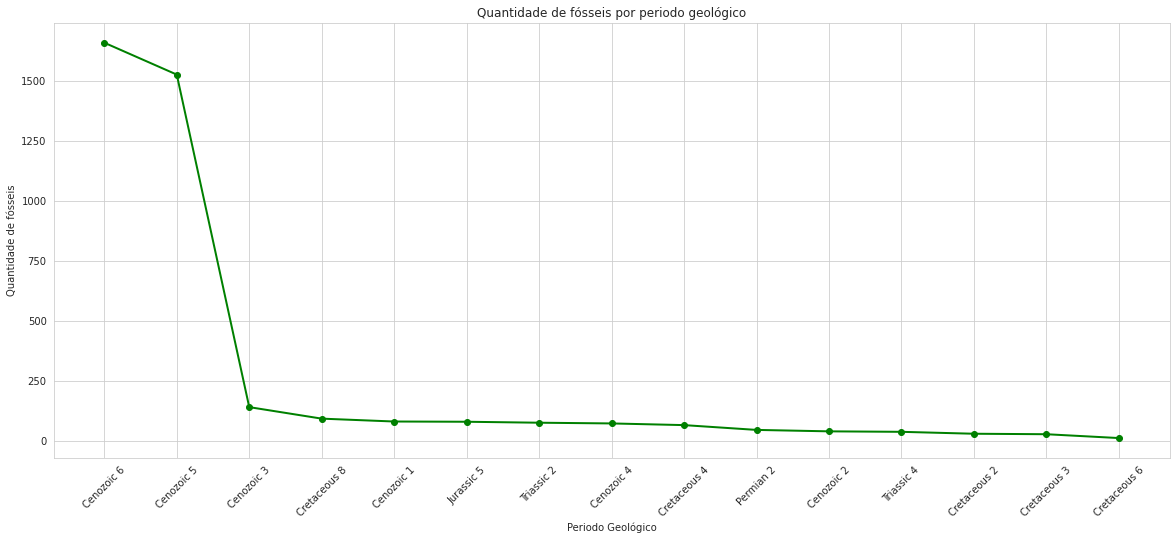

In [15]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis por periodo geológico")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Periodo Geológico")
plt.plot(dados['10_my_bin'].value_counts().head(15), marker="o", linewidth=2, color='green')

#Espécies e gêneros:

In [16]:
#Verificando as espécies presentes no conjunto
dados['occurrence.genus_name'].value_counts()

Purussaurus     42
Equus           40
Carcharhinus    40
Megatherium     39
Sula            39
                ..
Tetragraptus     1
Myctophum        1
Pardinamys       1
Sievertsella     1
Eohyrax          1
Name: occurrence.genus_name, Length: 1856, dtype: int64

Podemos ver que o gênero com maior número de registros, nesse conjunto de dados, é o Purussaurus, com 42 registros.

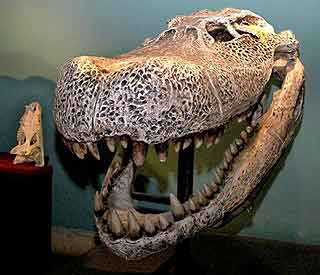

Habitava a região da floresta amazônica, incluindo Brasil, Panamá, Peru, Colômbia e Venezuela, durante o periódo Mioceno.

Fonte: 
*   https://dinopedia.fandom.com/wiki/Purussaurus
*   https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0117944


Olhando os 15 registros de espécies com maior número de fósseis nesse conjunto, conseguimos observar que existem diversos crocodilomorfos, alguns mamíferos, moluscos 

In [17]:
dados['occurrence.genus_name'].value_counts().head(15)

Purussaurus      42
Equus            40
Carcharhinus     40
Megatherium      39
Sula             39
Glyptodon        37
Turritella       33
Scleromys        27
Mourasuchus      27
Glossotherium    27
Hyperodapedon    25
Eremotherium     25
Toxodon          24
Gryposuchus      24
Caiman           24
Name: occurrence.genus_name, dtype: int64

In [18]:
dados['occurrence.genus_name'].value_counts(normalize=True).head(15)

Purussaurus      0.008282
Equus            0.007888
Carcharhinus     0.007888
Megatherium      0.007691
Sula             0.007691
Glyptodon        0.007296
Turritella       0.006508
Scleromys        0.005324
Mourasuchus      0.005324
Glossotherium    0.005324
Hyperodapedon    0.004930
Eremotherium     0.004930
Toxodon          0.004733
Gryposuchus      0.004733
Caiman           0.004733
Name: occurrence.genus_name, dtype: float64

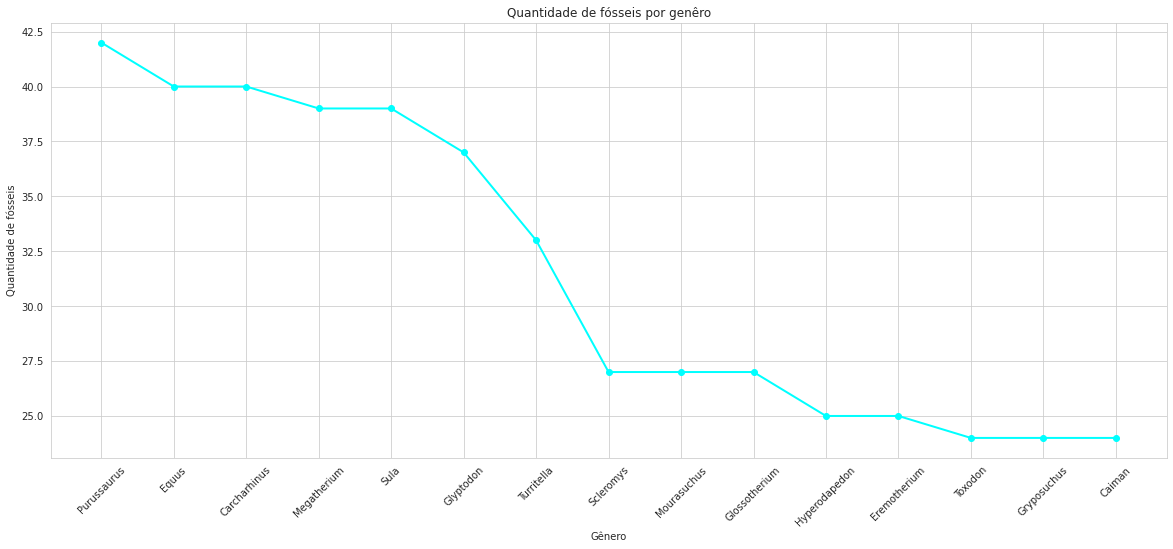

In [19]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis por genêro")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Gênero")
plt.plot(dados['occurrence.genus_name'].value_counts().head(15), marker="o", linewidth=2, color='cyan')

In [20]:
#Espécies de Purrusaurus 
dados[dados['occurrence.genus_name'] == "Purussaurus"]['occurrence.species_name'].value_counts()

sp.             23
neivensis        9
mirandai         8
brasiliensis     2
Name: occurrence.species_name, dtype: int64

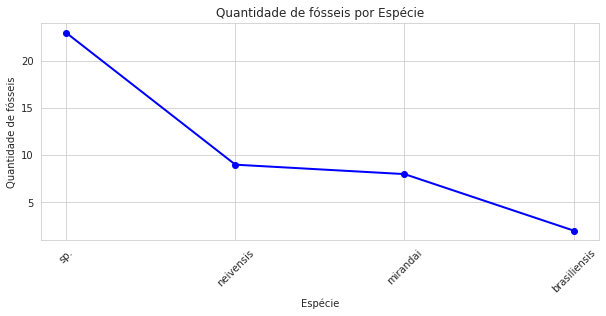

In [21]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis da espécie Purussaurus")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Espécie")
plt.plot(dados[dados['occurrence.genus_name'] == "Purussaurus"]['occurrence.species_name'].value_counts(), marker="o", linewidth=2, color='blue')

In [22]:
#Verificando as espécies de "Carcharhinus"
dados[dados['occurrence.genus_name'] == "Carcharhinus"]['occurrence.species_name'].value_counts()

sp.               14
egertoni           5
brachyurus         4
ackermanii         3
priscus            3
ackermanni         2
obscurus           2
ackermani          1
priscusi           1
falciformis        1
leucas             1
albimarginatus     1
porosus            1
macloti            1
Name: occurrence.species_name, dtype: int64

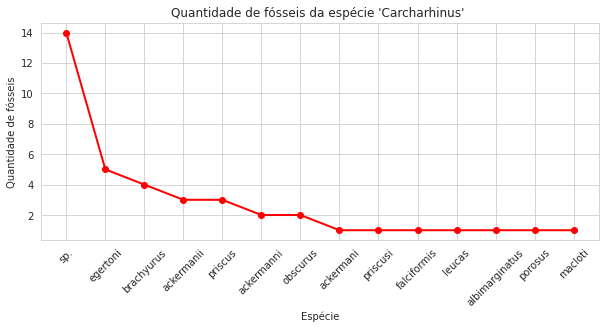

In [23]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis da espécie 'Carcharhinus' ")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Espécie")
plt.plot(dados[dados['occurrence.genus_name'] == "Carcharhinus"]['occurrence.species_name'].value_counts(), marker="o", linewidth=2, color='red')

In [24]:
dados[dados['occurrence.genus_name'] == "Equus"]['occurrence.species_name'].value_counts()

andium          11
sp.             11
caballus         9
martinei         4
santaeelenae     3
insulatus        2
Name: occurrence.species_name, dtype: int64

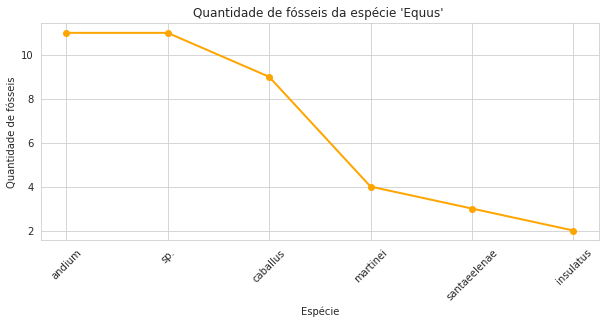

In [25]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis da espécie 'Equus' ")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Espécie")
plt.plot(dados[dados['occurrence.genus_name'] == "Equus"]['occurrence.species_name'].value_counts(), marker="o", linewidth=2, color='orange')

In [26]:
dados[dados['occurrence.genus_name'] == "Sula"]['occurrence.species_name'].value_counts()

sp.            17
sula            8
dactylatra      5
leucogaster     2
magna           2
variegata       2
figueroae       1
sulita          1
brandi          1
Name: occurrence.species_name, dtype: int64

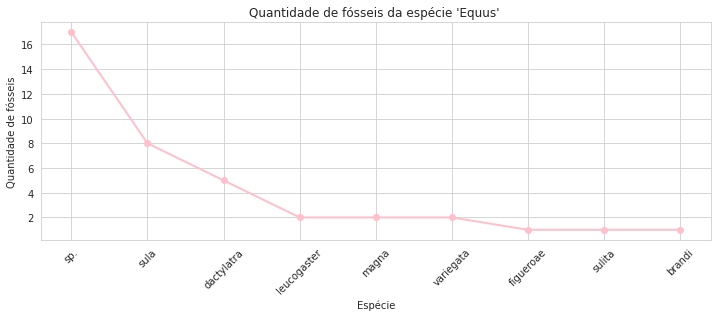

In [27]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis da espécie 'Equus' ")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Espécie")
plt.plot(dados[dados['occurrence.genus_name'] == "Sula"]['occurrence.species_name'].value_counts(), marker="o", linewidth=2, color='pink')

In [28]:
dados[dados['occurrence.genus_name'] == "Megatherium"]['occurrence.species_name'].value_counts()

americanum      11
sp.              7
altiplanicum     4
tarijense        3
medinae          2
urbinai          2
tarijensis       2
celendinense     1
sp. 3            1
americium        1
sp. 1            1
sp. 2            1
elenense         1
uquiensis        1
sundti           1
Name: occurrence.species_name, dtype: int64

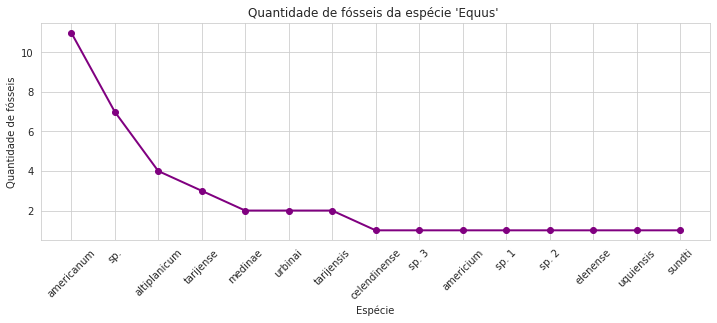

In [29]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis da espécie 'Equus' ")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Espécie")
plt.plot(dados[dados['occurrence.genus_name'] == "Megatherium"]['occurrence.species_name'].value_counts(), marker="o", linewidth=2, color='purple')

#Labs

In [30]:
#Laboratórios com mais pesquisas, neste conjunto, em odem descrescente
dados['collection.authorizer'].value_counts()

M. Uhen         1874
C. Jaramillo     868
P. Mannion       411
J. Alroy         404
M. Carrano       314
J. Zijlstra      271
D. Croft         222
R. Butler        198
C. Bell          114
M. Clapham        89
P. Holroyd        70
J. Mueller        50
J. Head           31
R. Benson         29
E. Fara           22
J. Hunter         18
A. Cardenas       18
M. Foote          14
S. Peters          9
A. Hendy           7
A. Liparini        7
W. Kiessling       5
P. Wagner          5
G. Lloyd           5
AD. Rincon         3
T. Olszewski       3
M. Aberhan         3
A. Stafford        2
V. Fischer         2
J. Marcot          1
A. Rincon          1
E. Vlachos         1
Name: collection.authorizer, dtype: int64

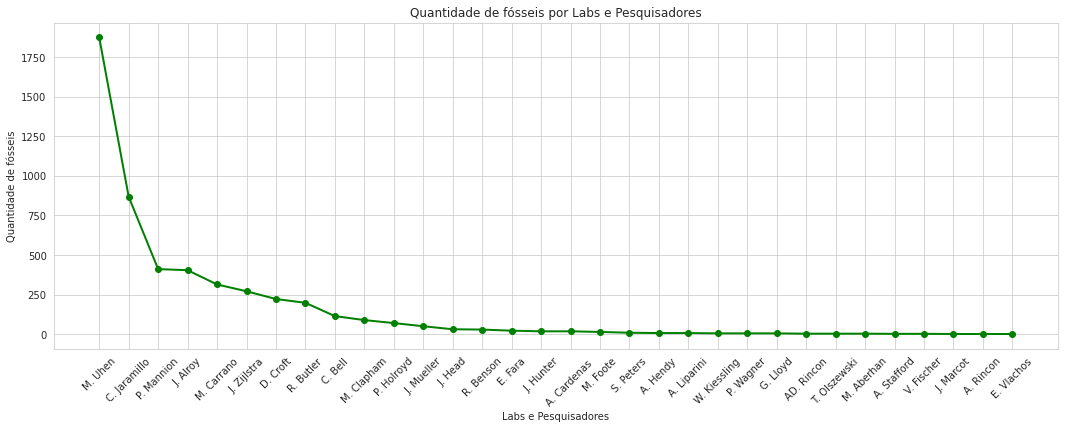

In [45]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis por Labs e Pesquisadores")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Labs e Pesquisadores")
plt.plot(dados['collection.authorizer'].value_counts(), marker="o", linewidth=2, color='green')

In [31]:
#Porcentagem dos labs com mais pesquisas
dados['collection.authorizer'].value_counts(normalize=True)

M. Uhen         0.369552
C. Jaramillo    0.171169
P. Mannion      0.081049
J. Alroy        0.079669
M. Carrano      0.061921
J. Zijlstra     0.053441
D. Croft        0.043778
R. Butler       0.039046
C. Bell         0.022481
M. Clapham      0.017551
P. Holroyd      0.013804
J. Mueller      0.009860
J. Head         0.006113
R. Benson       0.005719
E. Fara         0.004338
J. Hunter       0.003550
A. Cardenas     0.003550
M. Foote        0.002761
S. Peters       0.001775
A. Hendy        0.001380
A. Liparini     0.001380
W. Kiessling    0.000986
P. Wagner       0.000986
G. Lloyd        0.000986
AD. Rincon      0.000592
T. Olszewski    0.000592
M. Aberhan      0.000592
A. Stafford     0.000394
V. Fischer      0.000394
J. Marcot       0.000197
A. Rincon       0.000197
E. Vlachos      0.000197
Name: collection.authorizer, dtype: float64

Laboratório Uhen da Universidade de George Mason, no estado da Virgínia, Estados Unidos: http://uhenlab.weebly.com/

In [32]:
#Espécies pesquisadas pelo lab Uhen
dados[dados['collection.authorizer'] == "M. Uhen"]['occurrence.genus_name'].value_counts()

Carcharhinus          39
Turritella            32
Corbula               23
Carcharodon           22
Chama                 20
                      ..
Gibbolucina            1
Cervus                 1
Belonodelphis          1
Paratumidocarcinus     1
Bittium                1
Name: occurrence.genus_name, Length: 786, dtype: int64

Podemos ver que grande parte dos fósseis, neste conjunto, sobre o Lab Uhen são de espécies marinhas, mas também possuem mamíferos e insetos.

In [33]:
#Quantidade fósseis
len(dados[dados['collection.authorizer'] == "M. Uhen"]['occurrence.genus_name'].value_counts())

786

Carlos Jaramillo: https://stri.si.edu/scientist/carlos-jaramillo

In [36]:
#Espécies pesquisadas pelo pesquisados Carlos Jaramillo
dados[dados['collection.authorizer'] == "C. Jaramillo"]['occurrence.genus_name'].value_counts()

Equus            27
Megatherium      24
Glossotherium    20
Scleromys        20
Eremotherium     18
                 ..
Patasola          1
Gryposuchus       1
Luribayomys       1
Agathistoma       1
Eurygenium        1
Name: occurrence.genus_name, Length: 358, dtype: int64

In [39]:
dados[dados['collection.authorizer'] == "C. Jaramillo"]['occurrence.genus_name'].value_counts().head(15)

Equus                 27
Megatherium           24
Glossotherium         20
Scleromys             20
Eremotherium          18
Glyptodon             14
Haplomastodon         13
Hippidion             13
Palaeolama            12
Macrauchenia          11
Stegomastodon         10
Smilodon              10
Pseudoprepotherium     9
Lama                   9
Prodolichotis          8
Name: occurrence.genus_name, dtype: int64

In [34]:
#Verificando o registo do Jurrásico
dados[dados['10_my_bin'] == "Jurassic 3"]

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
4218,172177,NaN,M. Carrano,NaN,Ichthyosaurus,NaN,sp.,NaN,NaN,NaN,NaN,55912,Jurassic 3


In [35]:
#Verificando o registo do Jurrásico
dados[dados['10_my_bin'] == "Jurassic 1"]

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
4038,159703,NaN,R. Benson,n. gen.,Laquintasaura,n. sp.,venezuelae,NaN,NaN,NaN,NaN,52146,Jurassic 1
